"DATA SCIENCE"**

January-20

AUTHOR - SALMAN KHAN B

BEGINNER LEVEL TASK

TASK-1- Decision Tree ML Project:

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The Decision tree Employees Salary Pridiction dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Dataset link : https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer


# Decision Tree
# used for both regression and clasification 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv(r"D:\Python\all zip fil\Salary Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [5]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [5]:
# specific find the null values 

df[df['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Remove Null Values 
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [8]:
# duplicates check
df.duplicated().sum()

49

In [9]:
# Remove the Duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [12]:
# Find the object columns only

df.select_dtypes('O')

,Gender,Education Level,Job Title
0,Male,Bachelor's,Software Engineer
1,Female,Master's,Data Analyst
2,Male,PhD,Senior Manager
3,Female,Bachelor's,Sales Associate
4,Male,Master's,Director
...,...,...,...
348,Female,Bachelor's,Junior Operations Manager
349,Male,Bachelor's,Senior Business Development Manager
350,Female,PhD,Senior Data Scientist
351,Male,Bachelor's,Junior Marketing Coordinator


In [13]:
df.select_dtypes('O').columns

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')

In [14]:
#LabelEncoding --> Categorical To Numerical convert

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for i in df.select_dtypes('O').columns:
    df[i]=LE.fit_transform(df[i])

In [15]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,0,0,68,1.0,35000.0
349,36.0,1,0,111,8.0,110000.0
350,44.0,0,2,115,16.0,160000.0
351,31.0,1,0,63,3.0,55000.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    int32  
 2   Education Level      324 non-null    int32  
 3   Job Title            324 non-null    int32  
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), int32(3)
memory usage: 13.9 KB


In [17]:
x = df.iloc[:,:-1]
y = df['Salary']
x,y

(      Age  Gender  Education Level  Job Title  Years of Experience
 0    32.0       1                0        159                  5.0
 1    28.0       0                1         17                  3.0
 2    45.0       1                2        130                 15.0
 3    36.0       0                0        101                  7.0
 4    52.0       1                1         22                 20.0
 ..    ...     ...              ...        ...                  ...
 348  28.0       0                0         68                  1.0
 349  36.0       1                0        111                  8.0
 350  44.0       0                2        115                 16.0
 351  31.0       1                0         63                  3.0
 371  43.0       1                1         30                 19.0
 
 [324 rows x 5 columns],
 0       90000.0
 1       65000.0
 2      150000.0
 3       60000.0
 4      200000.0
          ...   
 348     35000.0
 349    110000.0
 350    160000.0
 351

In [20]:
cols = x.columns.tolist()
cols

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']

In [21]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
x_scaled = pd.DataFrame(MM.fit_transform(x),columns = cols)
x_scaled.head()

,Age,Gender,Education Level,Job Title,Years of Experience
0,0.300000,1.0,0.0,0.919075,0.20
1,0.166667,0.0,0.5,0.098266,0.12
2,0.733333,1.0,1.0,0.751445,0.60
3,0.433333,0.0,0.0,0.583815,0.28
4,0.966667,1.0,0.5,0.127168,0.80


In [22]:
x_scaled.Age.min(),x_scaled.Age.max()

(0.0, 1.0)

In [24]:
minmax = (x.Age-x.Age.min())/(x.Age.max()-x.Age.min())
minmax.min(),minmax.max()

(0.0, 1.0)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=123)

In [26]:
model = DecisionTreeRegressor(random_state=123)
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=123)

In [27]:
y_pred = model.predict(x_test)
y_pred

array([ 65000., 160000.,  45000.,  40000., 110000.,  50000.,  50000.,
        75000., 125000.,  60000., 100000., 150000.,  65000., 130000.,
        45000.,  50000.,  50000., 130000., 170000.,  60000., 150000.,
        50000., 180000.,  60000., 140000., 110000., 130000.,  55000.,
       110000.,  45000., 130000.,  45000., 100000.,  60000., 100000.,
       180000.,  90000., 110000., 175000.,  50000.,  50000., 160000.,
        95000.,  55000.,  95000.,  40000., 110000., 180000., 150000.,
        60000.,  95000.,  50000.,  55000., 105000.,  55000.,  45000.,
        50000., 110000., 140000., 180000.,  60000., 250000., 130000.,
        45000., 160000.])

In [28]:
model.score(x_train,y_train),model.score(x_test,y_test)

(0.9983289994719731, 0.8665056420431893)

In [29]:
from sklearn.metrics import r2_score
print('r2:',r2_score(y_pred,y_test))

r2: 0.8563589654054324


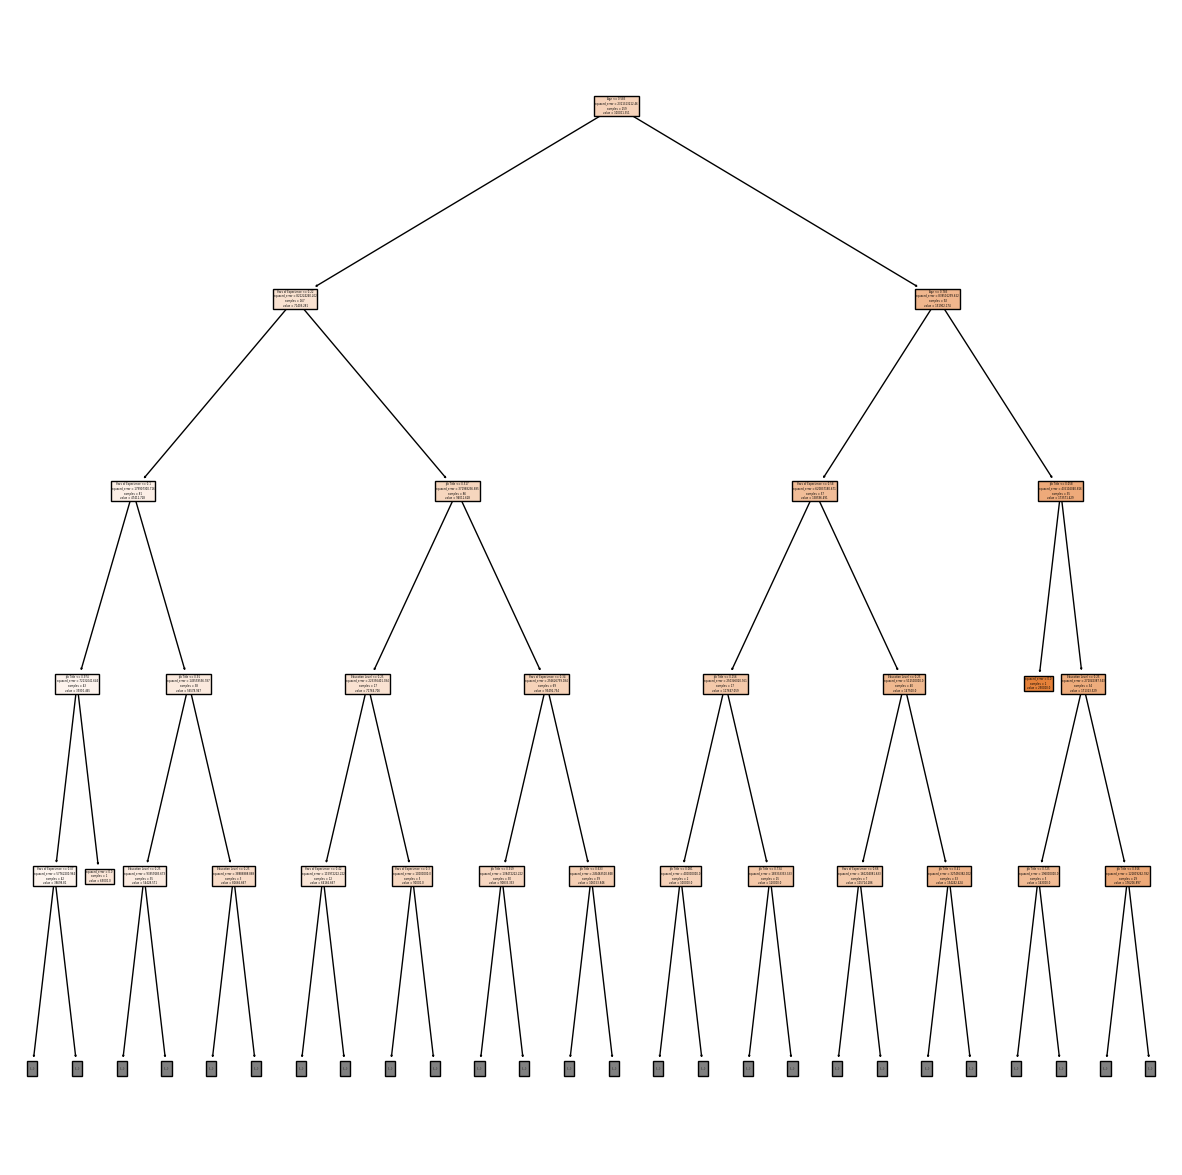

In [30]:
%matplotlib inline
from sklearn import tree
ax = plt.figure(figsize=(15,15))
ax = tree.plot_tree(model,filled=True,max_depth=4,feature_names=df.columns)

# hyperparameter tuning
# Grid search cv
# random search cv

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQgSlWF6oPPhXC6eREyDEVOQtKHXDDd8fpjNg&s">

In [31]:
grid = {'max_depth':[2,3],
       'min_samples_split': [2, 3],
       'min_samples_leaf': range(1, 5)}

In [32]:
from sklearn.model_selection import GridSearchCV
model =  DecisionTreeRegressor()
gcv = GridSearchCV(estimator=model,param_grid=grid,cv=5,scoring='r2',verbose=3)
gcv.fit(x_train,y_train)
gcv

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.774 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.863 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.730 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.693 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.825 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.774 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.863 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.730 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=3;, score=0.693 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, mi

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3], 'min_samples_leaf': range(1, 5),
                         'min_samples_split': [2, 3]},
             scoring='r2', verbose=3)

In [33]:
gcv.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=3)

In [34]:
gcv.score(x_train,y_train),gcv.score(x_test,y_test)

(0.8920973188756028, 0.8359431737628211)

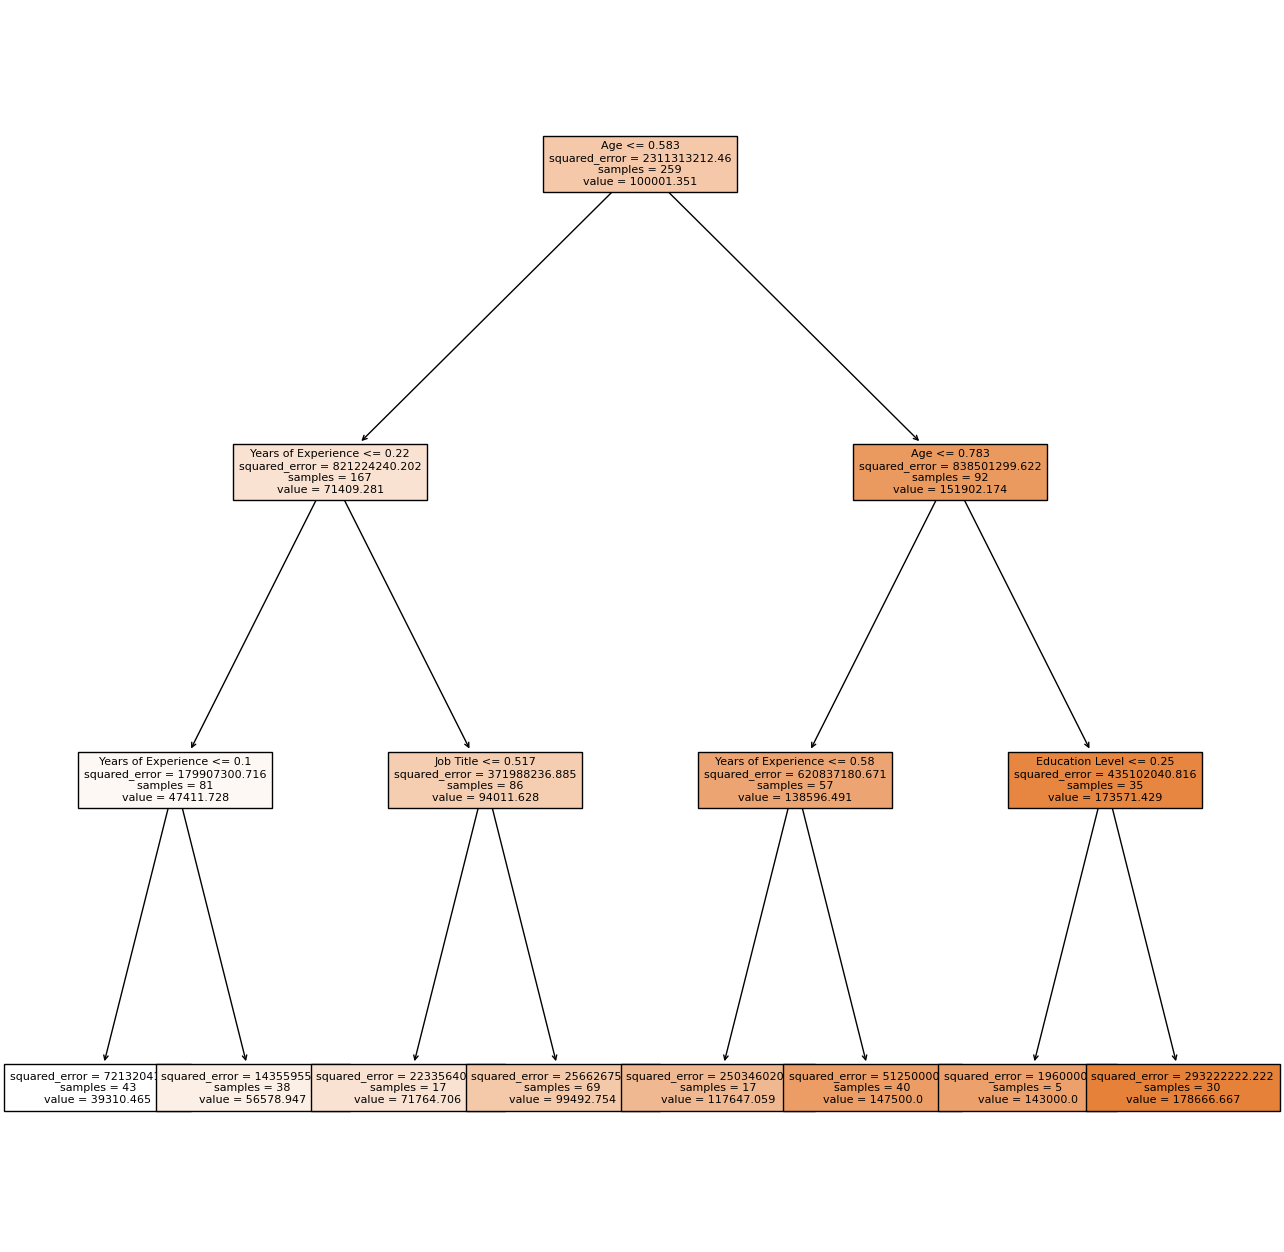

In [35]:
from sklearn import tree
ax = plt.figure(figsize=(16,16))
ax = tree.plot_tree(gcv.best_estimator_,filled=True,feature_names=x.columns,fontsize=8)